In [1]:
%load_ext autoreload
%autoreload 2

## Predictive: XGBoost Regressor Model

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
import sys
sys.path.insert(0, '../../src')

In [7]:
sales_train = pd.read_parquet('../../data/interim/predictive_sales_train.to_parquet')

In [8]:
from features.data_prep import preprocess

In [9]:
df_train, item_id_encoder, dept_id_encoder, store_id_encoder, state_id_encoder, cat_id_encoder = preprocess(sales_train.copy())

### Save the `encoder` in the `models/predictive` folder.

In [10]:
from joblib import dump

dump(item_id_encoder, '../../models/predictive/item_id_encoder.joblib')
dump(dept_id_encoder, '../../models/predictive/dept_id_encoder.joblib')
dump(store_id_encoder, '../../models/predictive/store_id_encoder.joblib')
dump(state_id_encoder, '../../models/predictive/state_id_encoder.joblib')
dump(cat_id_encoder, '../../models/predictive/cat_id_encoder.joblib')

['../../models/predictive/cat_id_encoder.joblib']

In [11]:
del sales_train

In [12]:
df_train

,item_id,dept_id,cat_id,store_id,state_id,sales,sell_price,year,month,week_number,day_of_week,season_sin,season_cos
0,1437,3,1,0,0,0,8.296590,2011,1,1,5,0.500000,0.866025
1,1438,3,1,0,0,0,3.967419,2011,1,1,5,0.500000,0.866025
2,1439,3,1,0,0,0,2.965568,2011,1,1,5,0.500000,0.866025
3,1440,3,1,0,0,0,4.500594,2011,1,1,5,0.500000,0.866025
4,1441,3,1,0,0,0,2.881908,2011,1,1,5,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47107045,1432,2,0,9,2,2,2.880000,2015,4,221,5,0.866025,-0.500000
47107046,1433,2,0,9,2,0,2.000000,2015,4,221,5,0.866025,-0.500000
47107047,1434,2,0,9,2,0,3.980000,2015,4,221,5,0.866025,-0.500000
47107048,1435,2,0,9,2,0,1.280000,2015,4,221,5,0.866025,-0.500000


In [13]:
sales_test = pd.read_parquet('../../data/interim/predictive_sales_test.to_parquet')

In [14]:
df_test = preprocess(sales_test.copy())[0]

In [15]:
del sales_test

In [16]:
df_test

,item_id,dept_id,cat_id,store_id,state_id,sales,sell_price,year,month,week_number,day_of_week,season_sin,season_cos
47107050,1437,3,1,0,0,0,8.26,2015,4,222,6,0.866025,-0.500000
47107051,1438,3,1,0,0,0,3.97,2015,4,222,6,0.866025,-0.500000
47107052,1439,3,1,0,0,0,2.97,2015,4,222,6,0.866025,-0.500000
47107053,1440,3,1,0,0,4,4.64,2015,4,222,6,0.866025,-0.500000
47107054,1441,3,1,0,0,3,2.88,2015,4,222,6,0.866025,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59303045,1432,2,0,9,2,1,2.98,2016,5,279,6,0.500000,-0.866025
59303046,1433,2,0,9,2,0,2.48,2016,5,279,6,0.500000,-0.866025
59303047,1434,2,0,9,2,2,3.98,2016,5,279,6,0.500000,-0.866025
59303048,1435,2,0,9,2,0,1.28,2016,5,279,6,0.500000,-0.866025


#### Save the `df_train` and `df_test` to `data/processed`

In [17]:
df_train.to_parquet('../../data/processed/predictive_df_train.to_parquet')
df_test.to_parquet('../../data/processed/predictive_df_test.to_parquet')

#### Load the `extract_features_target` function

In [18]:
from features.data_prep import extract_features_target

In [19]:
X_train, X_test, y_train, y_test = extract_features_target(df_train, df_test, 'sales')

In [20]:
del df_train, df_test

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47107050, 12)
(47107050,)
(12196000, 12)
(12196000,)


#### Import the XGBRegressor and mean_square_error 

In [23]:
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error

In [24]:
xgb = XGBRegressor(objective='reg:tweedie', learning_rate=0.31, max_depth=9, subsample=0.7, colsample_bytree=0.7, n_estimators=100)

In [25]:
xgb_model = xgb.fit(X_train, y_train)

#### Save the `xgb_model` in `modeles/predictive`

In [26]:
dump(xgb_model, '../../models/predictive/xgb_model.joblib')

['../../models/predictive/xgb_model.joblib']

In [27]:
y_pred = xgb_model.predict(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

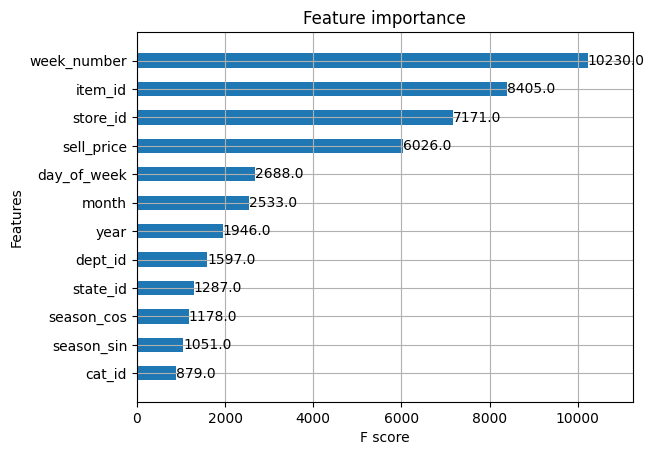

In [28]:
plot_importance(xgb_model, height=0.5)

In [29]:
predicted_sales = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
predicted_sales

,y_test,y_pred
47107050,0,0.574024
47107051,0,0.923057
47107052,0,0.164507
47107053,4,2.673545
47107054,3,0.989998
...,...,...
59303045,1,1.293452
59303046,0,1.361450
59303047,2,1.184664
59303048,0,0.775054


In [30]:
predicted_revenue = pd.DataFrame({'y_test': X_test['sell_price'] * y_test, 'y_pred': X_test['sell_price'] * y_pred})
predicted_revenue

,y_test,y_pred
47107050,0.00,4.741435
47107051,0.00,3.664534
47107052,0.00,0.488586
47107053,18.56,12.405250
47107054,8.64,2.851195
...,...,...
59303045,2.98,3.854488
59303046,0.00,3.376396
59303047,7.96,4.714962
59303048,0.00,0.992069


In [31]:
rmse = mean_squared_error(predicted_revenue['y_test'], predicted_revenue['y_pred'], squared=False)
print(rmse)

10.077022235907851
